In [114]:
import numpy as np
from scipy.special import hyp2f1, gamma
from scipy.stats import moment
import matplotlib.pyplot as plt

In [119]:
def coherence_phase(phase_diff, L, coherence, phase = 0):
    """
    Calulate PDF of phase based on coherence and number of looks.
    Equation: 59 from Bamler and Hartl (1998)
    https://www.researchgate.net/publication/263058382_Synthetic_Aperture_Radar_Interferometry
    """
    B = np.abs(coherence) * np.cos(phase_diff -  phase)
    C = (1 - coherence**2)**L
    pdf_phase_diff = gamma(L+1/2)*C*B/(2 * np.sqrt(np.pi) * gamma(L) * (1 - B**2)**(L+1/2)) + C/(2 * np.pi) \
        * hyp2f1(L, 1, 1/2, B**2)
    return pdf_phase_diff

def std_from_pdf(diffs, n, coherence, phase):
    """
    Calculate standard deviation from pdf
    https://www.texasgateway.org/resource/42-mean-or-expected-value-and-standard-deviation
    """
    phase_pfd = coherence_phase(diffs, n, coherence, phase)
    Expected_value = np.sum(phase_pfd*diffs)
    A = (diffs- Expected_value)**2*phase_pfd
    std = np.sqrt(np.sum(A))
    return std

1 - 4.335628020621919
2 - 3.098097545621454
4 - 1.9274259588151572
8 - 1.1525536673878698


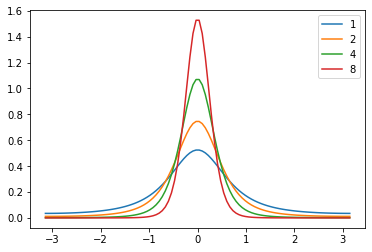

In [120]:

diffs = np.linspace(-np.pi, np.pi, 100)
for n in [1,2,4,8]:
    phase_pfd = coherence_phase(diffs, n, 0.7, 0)
    plt.plot(diffs, phase_pfd, label = n)
    std = std_from_pdf(diffs, n, 0.7, 0)
    print(str(n)+' - '+str(std))
plt.legend()
plt.show()

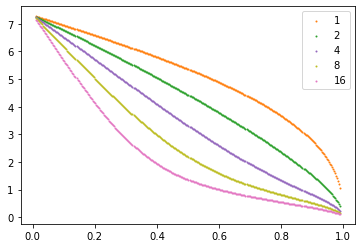

In [122]:
diffs = np.linspace(-np.pi, np.pi, 100)
cohs = np.linspace(0.01, 0.99, 300)
for n in [1,2,4,8,16]:
    for c in cohs:
            phase_pfd = coherence_phase(diffs, n, c, 0)       
            std = std_from_pdf(diffs, n, c, 0)
            if c == cohs[0]:
                plt.scatter(c, std, color = f'C{n}', label = n, s = 1)
            else:
                plt.scatter(c, std, color = f'C{n}', s = 1)
plt.legend()